# YOLOv8 Training — With Augmentation

**Objective:** Train the YOLOv8 model on the same dataset but with data augmentation.  
We’ll use `data2.yaml`, which contains augmentation configurations.  
We’ll compare results to the baseline (no augmentation).


In [1]:
from ultralytics import YOLO
import torch
import os


In [2]:
model = YOLO("yolov8s.pt")  # pretrained YOLOv8 small model

In [ ]:
# Train using the data2.yaml file ( augmentation)

# here we find the paths used in google colabe training 


results = model.train(
    data="/content/data2.yaml", 
    augment=True,
    flipud=0.5,
    fliplr=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    scale=0.5,
    translate=0.1,        
    epochs=50,                
    imgsz=640,                 
    batch=32,                  
    name="yolo_brain_aug",   
    project="models",     
    workers=4,                 
    patience=7,               
    lr0=0.001,
    lrf=0.01,
    optimizer="Adam",
    weight_decay=0.0005,
    save=True,
)




In [7]:
model_path = "../models/yolo_brain_aug/weights/best.pt"
if os.path.exists(model_path):
    print(f" Model saved successfully at: {model_path}")
else:
    print("Model file not found. Check training output folders.")


 Model saved successfully at: ../models/yolo_brain_aug/weights/best.pt


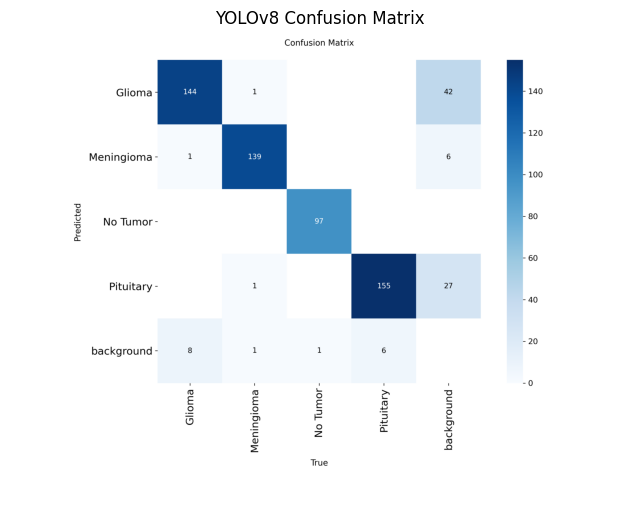

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the saved confusion matrix image
img = mpimg.imread("../models/yolo_brain_aug/confusion_matrix.png")

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Confusion Matrix")
plt.show()


In [9]:
# Evaluate model performance
model = YOLO(model_path)
metrics = model.val(
    data="../configs/data2.yaml",
    project="../models",
    name="brain_eval_aug",
    exist_ok=True
)


Ultralytics 8.3.220  Python-3.13.7 torch-2.9.0+cpu CPU (Intel Core Ultra 7 165H)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 65.626.2 MB/s, size: 23.4 KB)
val: Scanning C:\Users\kaout\OneDrive\Desktop\spint_1\MultiModal-Diagnosis-AI\data\data_yolo\labels\val.cache... 510 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 510/510 162.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 0.5it/s 1:081.9s2s
                   all        510        554      0.974      0.923      0.967      0.799
                Glioma        135        153      0.957      0.856      0.934      0.764
            Meningioma        140        142      0.993      0.976      0.992      0.848
              No Tumor         98         98          1      0.991      0.995      0.841
             Pituitary        154        161      0.945       0.87      0.945

In [11]:
print("mAP50:", metrics.box.map50)
print("mAP50-95:", metrics.box.map)
print("Precision:", metrics.box.mp)
print("Recall:", metrics.box.mr)


mAP50: 0.9665222909326364
mAP50-95: 0.7985919515731649
Precision: 0.9736048181185353
Recall: 0.9229756696652484


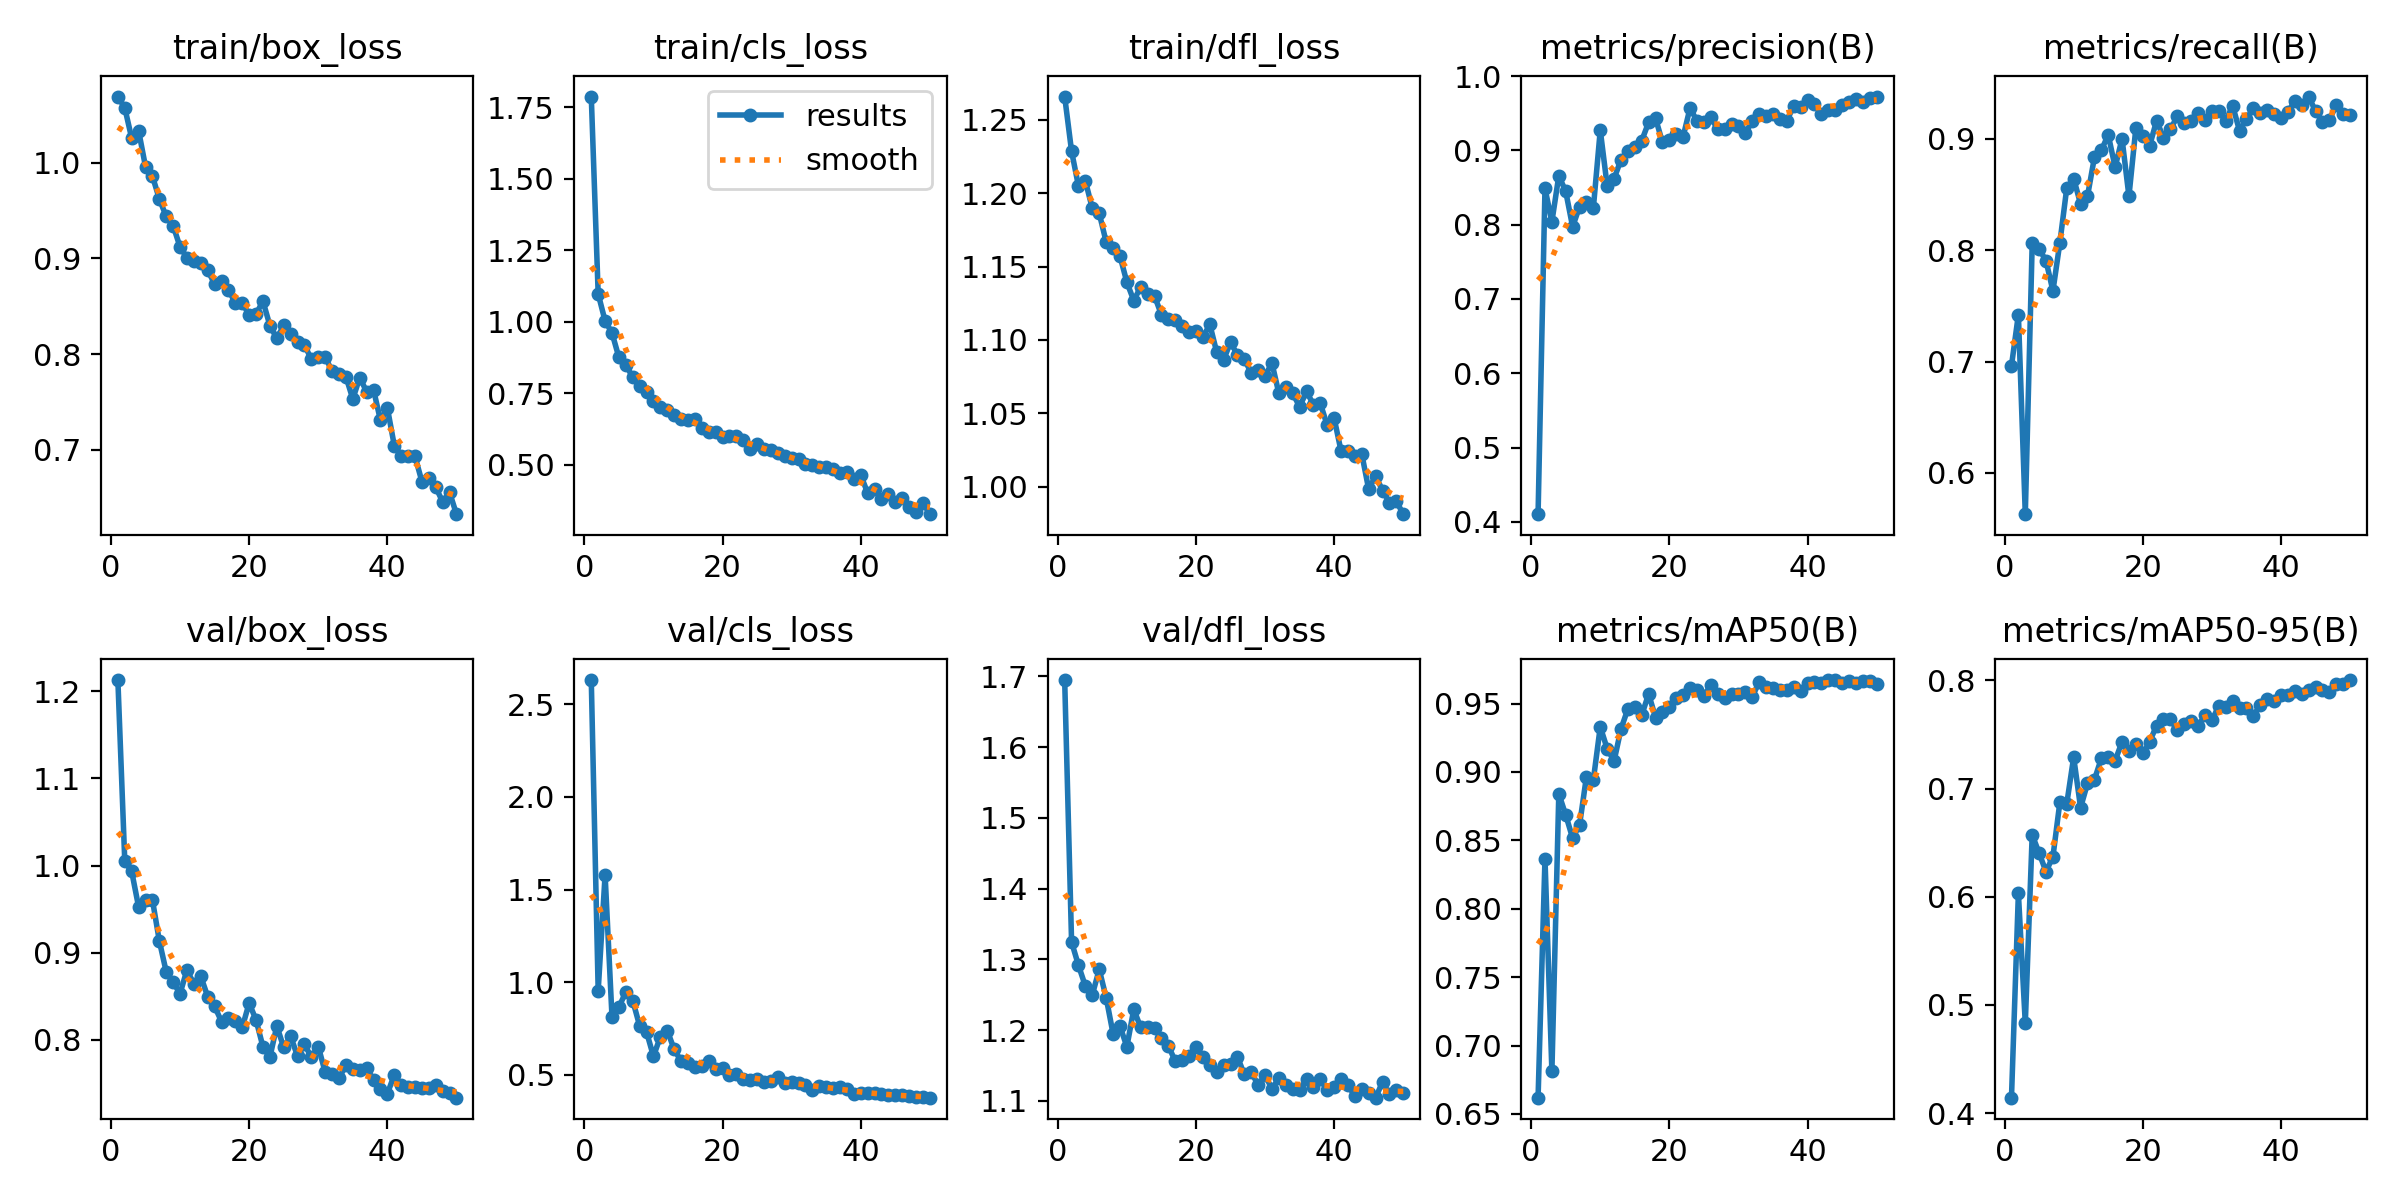

In [4]:
from IPython.display import Image, display

display(Image(filename="../models/yolo_brain_aug/results.png"))


##  Summary

- Model trained **with augmentation**
- Used `data2.yaml`
- Training results saved under: `runs/detect/yolo_brain_aug/`
- Next step: compare results with the non-augmented model in `yolo_evaluation.ipynb`


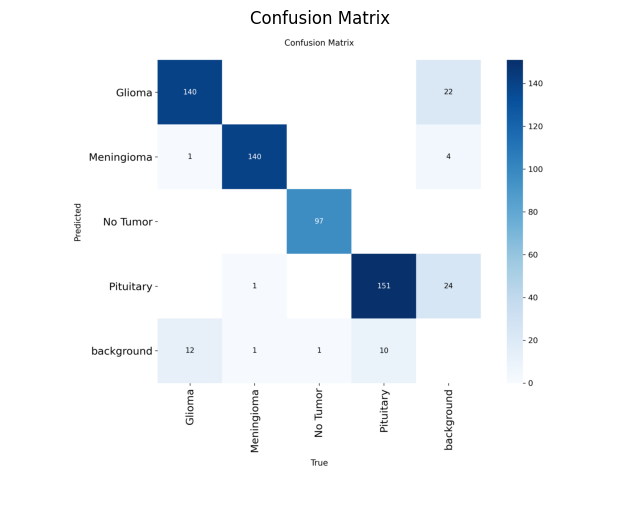

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Example: show confusion matrix
img = mpimg.imread("../models/brain_eval_aug/confusion_matrix.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()


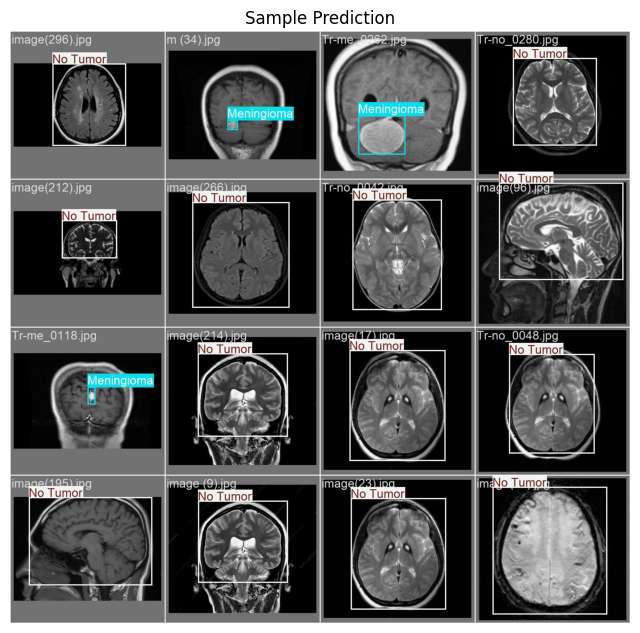

In [13]:
import glob

# Get one sample prediction image
image_path = glob.glob("../models/brain_eval/*.jpg")[0]

img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Sample Prediction")
plt.show()
